In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab_reconstruct2023.ipynb")

# Assignment

***
**Task**:  Suppose we have samples $x[n] = x(nT)$ of the signal
$$x(t) = \cos\left( \frac{t-5}{5} \right) - \left( \frac{t-5}{5} \right)^3$$
for $n=0, \ldots, N-1$, with $N=10$ and $T = 1.2$.  Consider the reconstruction equation
$$x_r(t) = \sum_{n=0}^{N-1} x[n] b_0(t-nT).$$
On the same set of axes plot both $x(t)$ and $x_r(t)$ over the range $t = 0$ to $t=(N-1)T$ for various different interpolants.
***

## Zero-order hold reconstruction

Generate a vector `xvs` containing the sample values $x[0], \ldots, x[N]$ for the values of $N$ and $T$ specified above.  The vector `tvs` should contain the corresponding time instants for the samples.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
T = 1.2
# Generate time instants for the samples
tvs = np.arange(N) * T

# Generate sample values for the given signal x(t)
xvs = np.cos((tvs - 5) / 5) - ((tvs - 5) / 5)**3

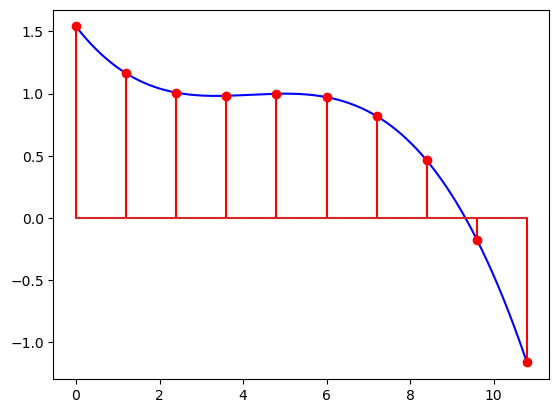

In [3]:
# Plot signal and sample values
tv = np.linspace(0,(N-1)*T,4000);
xv = np.cos((tv-5)/5) -((tv-5)/5)**3
plt.plot(tv,xv,'b-');
plt.stem(tvs,xvs,'r.');

In [4]:
grader.check("reconstruct_q1a")

reconstruct_q1a results: All test cases passed!
reconstruct_q1a - 1 message: vectors tv and xv have correct length
reconstruct_q1a - 2 message: vector tv has correct values

In the code block below, define the required centered interpolation function $b_0(t)$ to use in the reconstruction formula.  It should take a vector of time values `tv` and return the corresponding interpolation values `b0v`.  In this instance we require $b_0(t) = p_T(t) = p_1(t/T)$, where $p_T(t)$ is the unit pulse of total width $T$ centered on the origin.  For your implementation you should ensure that $b_0(-T/2) = b_0(T/2) = 1$.

In [5]:
def b0v_values(tv,T):
    b0v = np.where(np.abs(tv) <= T / 2, 1, 0)
    return b0v

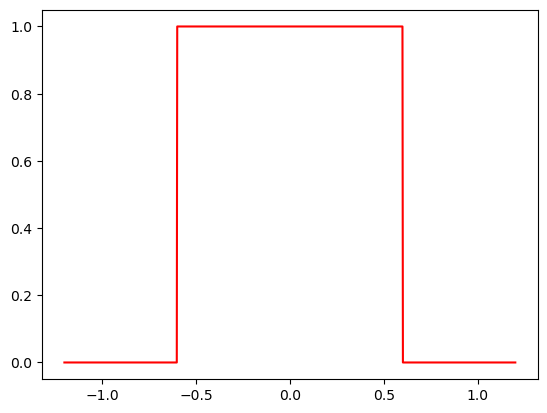

In [6]:
# Plot reconstruction basis
tvb = np.linspace(-T,T,1000)
b0vb = b0v_values(tvb,T)
plt.plot(tvb,b0vb,'r-');

In [7]:
grader.check("reconstruct_q1b")

reconstruct_q1b results: All test cases passed!
reconstruct_q1b - 1 message: output b0v has same shape as input tv0 for test case

The code block below should generate the reconstructed signal values at the given set of time instants `tv`, using the sample values `xvs` corresponding to sampling times `tvs`, and placing the result in the vector `xvr` of the same dimension as `tv`.  You should assume that the sampled signal values are zero outside of the range over which the samples were taken.

In [8]:
tv = np.linspace(0,(N-1)*T,4000);
xvr = np.zeros_like(tv)
for i in range(0,len(xvs)):   
    xvr = xvr = xvr + xvs[i] * b0v_values(tv - i * T, T)

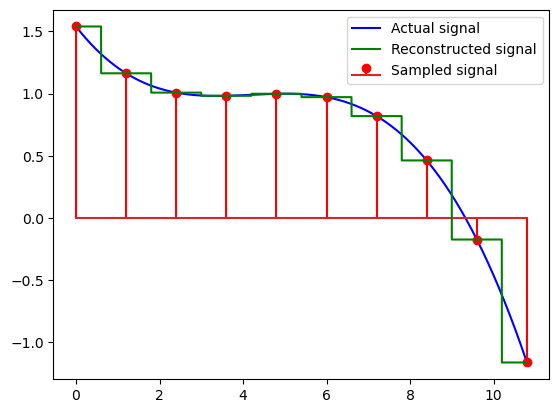

In [9]:
plt.plot(tv,xv,'b-',label='Actual signal');
plt.stem(tvs,xvs,'r.',label='Sampled signal');
plt.plot(tv,xvr,'g-',label='Reconstructed signal');
plt.legend();

In [10]:
grader.check("reconstruct_q1c")

reconstruct_q1c results: All test cases passed!
reconstruct_q1c - 1 message: xvr has same shape as tv
reconstruct_q1c - 2 message: xvr has correct start and end values

***

## First-order hold reconstruction

Repeat the reconstruction process developed in the previous section, but with the reconstruction kernel
$$
b_1(t) = (1 - |t|/T) p_T(t).
$$
The code block below should exit with `xv1r` containing the values of the reconstructed signal at time instants `tv`.

In [11]:
tv = np.linspace(0,(N-1)*T,4000);
def b1v_values(tv,T):
    b1vc = (1 - np.abs(tv) / T) * np.where(np.abs(tv) <= T, 1, 0)
    return np.maximum(b1vc, 0) 

xv1r = np.zeros(tv.shape)
for i in range(0,len(xvs)):   
    xv1r = xv1r = xv1r + xvs[i] * b1v_values(tv - i * T, T)

In [ ]:
# Plot reconstruction basis
tvb = np.linspace(-2*T,2*T,1000)
b1vb = b1v_values(tvb,T)
plt.plot(tvb,b1vb,'r-');

In [ ]:
plt.plot(tv,xv,'b-',label='Actual signal');
plt.stem(tvs,xvs,'r.',label='Sampled signal');
plt.plot(tv,xv1r,'g-',label='Reconstructed signal');
plt.legend();

In [ ]:
grader.check("reconstruct_q1d")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)